In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("C:/Users/iannr/OneDrive/Desktop/Data_Projects/Mall_Customers.csv")

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#Preprocessing

data.drop('CustomerID', axis=1, inplace=True)

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [5]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


C:\Users\iannr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iannr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iannr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\iannr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

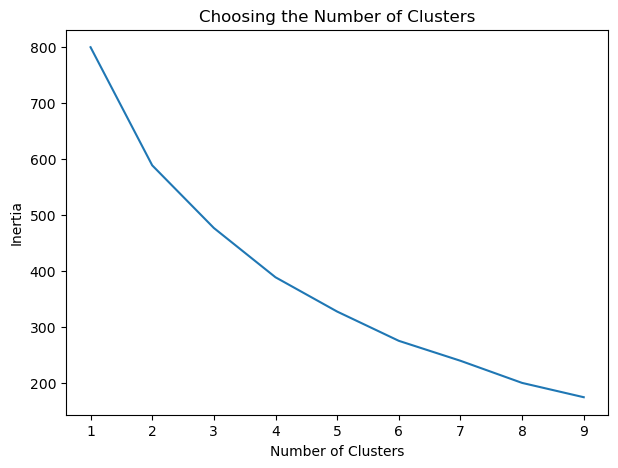

In [6]:
#Clustering

import os
os.environ["OMP_NUM_THREADS"] = "1"
import sklearn

max_clusters = 10


kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [7]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

C:\Users\iannr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=10, n_init=10)

In [8]:
clusters = kmeans.predict(scaled_data)
clusters

array([9, 9, 0, 6, 0, 6, 0, 6, 4, 6, 4, 6, 0, 6, 4, 9, 0, 9, 4, 6, 9, 9,
       0, 9, 0, 9, 0, 9, 0, 6, 4, 6, 4, 9, 0, 6, 0, 6, 0, 6, 2, 9, 4, 3,
       0, 6, 2, 3, 3, 3, 2, 9, 3, 4, 2, 4, 2, 4, 3, 4, 4, 9, 2, 2, 4, 9,
       2, 2, 9, 3, 4, 2, 2, 2, 4, 9, 2, 4, 3, 2, 4, 9, 4, 2, 3, 4, 2, 3,
       3, 2, 2, 9, 4, 3, 3, 9, 2, 3, 4, 9, 3, 2, 4, 9, 4, 3, 2, 4, 4, 4,
       4, 3, 3, 9, 3, 3, 2, 2, 2, 2, 9, 3, 3, 1, 3, 7, 8, 1, 4, 1, 8, 1,
       3, 7, 8, 7, 5, 1, 8, 7, 5, 1, 3, 7, 8, 1, 8, 7, 5, 1, 8, 1, 5, 7,
       5, 7, 8, 7, 8, 7, 2, 7, 8, 7, 8, 7, 8, 7, 5, 1, 8, 1, 8, 1, 5, 7,
       8, 1, 8, 1, 5, 7, 8, 7, 5, 1, 5, 1, 5, 7, 5, 7, 8, 7, 5, 7, 5, 1,
       8, 1])

In [10]:
#PCA

pca = PCA(n_components=2)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [11]:
kmeans.cluster_centers_

array([[-0.88640526,  0.19294198, -1.2985827 , -1.14553467],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [ 1.12815215,  1.33075947, -0.48486081, -0.42786906],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [ 1.12815215, -1.02205127, -0.75821082,  0.43783969]])

In [12]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

C:\Users\iannr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 0.71982753, -1.68765552],
       [-0.88272588,  1.65431318],
       [ 0.58233488, -0.85939176],
       [-0.662429  , -0.58044771],
       [ 1.47661839,  0.1540349 ],
       [ 0.81659377,  0.24505923],
       [-1.6696024 , -1.35294268],
       [-1.38150389,  0.3644368 ],
       [ 1.19961046,  1.30582744],
       [-0.73489077,  0.27816597]])

In [13]:
reduced_data['cluster'] = clusters
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,9
1,-1.427673,-0.367310,9
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,6
4,-0.313108,-1.810483,0
...,...,...,...
195,-1.179572,1.324568,7
196,0.672751,1.221061,5
197,-0.723719,2.765010,1
198,0.767096,2.861930,8


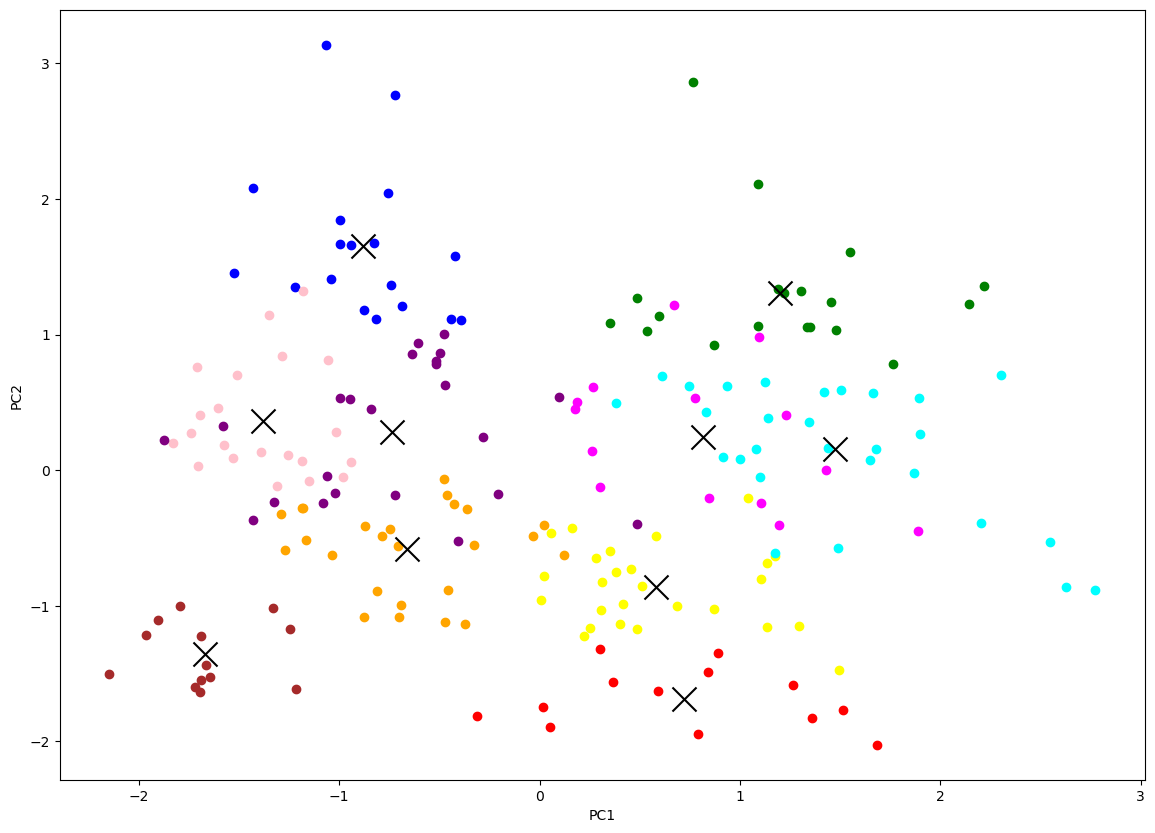

In [14]:
#Data Visualization

plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()